Objective: From the titanic dataset, we need to predict survival of the passengers.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# reading the dataset 
df=pd.read_csv(r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [4]:
##  Dataset description
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### EDA- Exploratory Data Analysis

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [11]:
# Since the columns PassengerId , Cabin, Ticket Number, Name does not contribute anythinh towards the model training,
#so we'll drop them
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Survived
0    549
1    342
Name: count, dtype: int64


/tmp/ipykernel_21/294010914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='flare')


<Axes: xlabel='Survived', ylabel='count'>

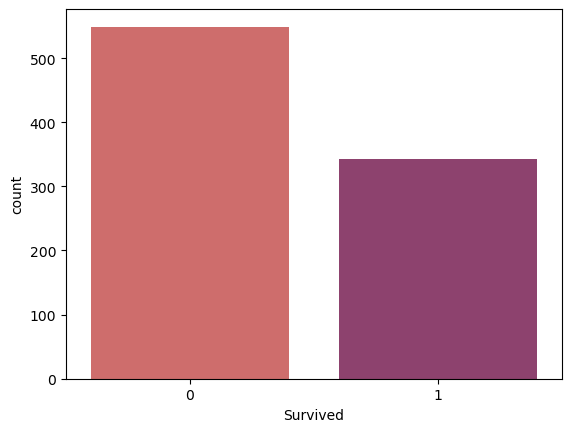

In [14]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df,palette='flare')

In [16]:
# Obs: out of total passengers, 549 could no survive and 342 survived

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


/tmp/ipykernel_21/3914684751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=df,palette='flare')


<Axes: xlabel='Pclass', ylabel='count'>

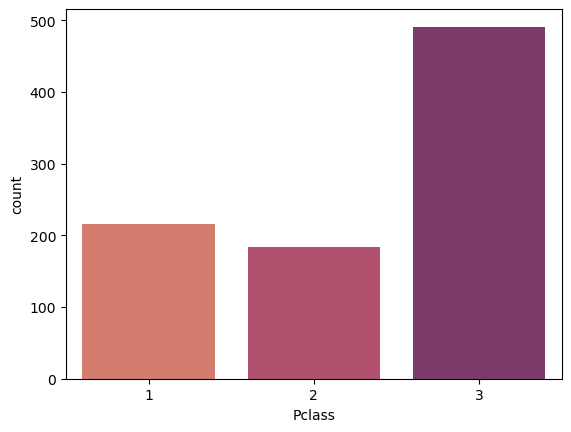

In [17]:
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass',data=df,palette='flare')

In [19]:
# Obs: There are 216, 184 and 491 passengers in Passenger class 1,2 3 respectively

Sex
male      577
female    314
Name: count, dtype: int64


/tmp/ipykernel_21/271940047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette='flare')


<Axes: xlabel='Sex', ylabel='count'>

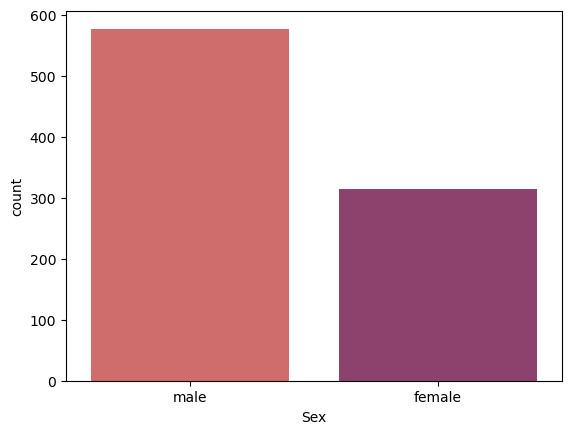

In [20]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df,palette='flare')

In [22]:
# Obs: There are 577 males and 314 females

<Axes: xlabel='Survived', ylabel='count'>

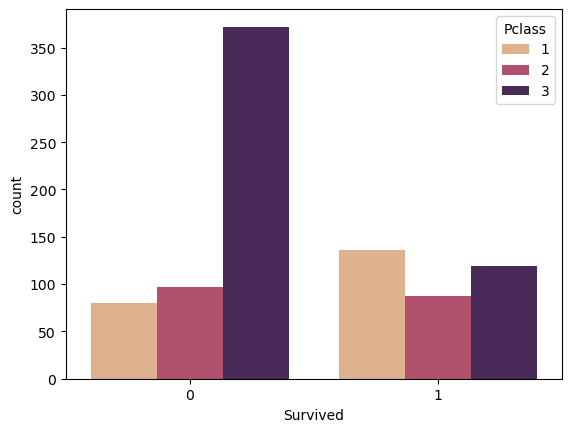

In [23]:
# Relationship Between Pclass and survived passengers
sns.countplot(x='Survived',hue='Pclass',data=df,palette='flare')

In [25]:
# Obs: The maximum number of people who did not survive are from Passenger class 3 and the most number of peoplr survived from
# Passenger class 3

<Axes: xlabel='Survived', ylabel='count'>

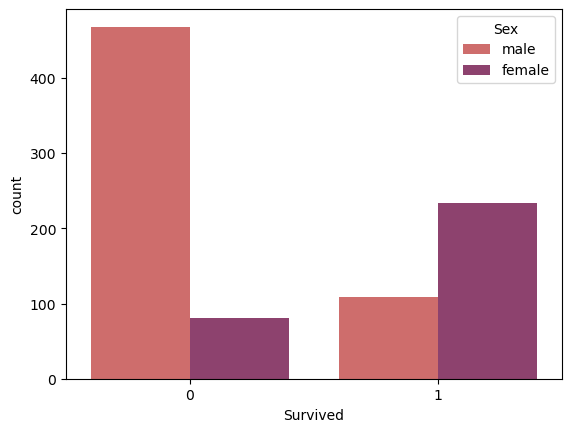

In [26]:
# Relationship between Survived and Sex
sns.countplot(x='Survived',hue='Sex',data=df,palette='flare')

In [28]:
# Obs : Maximum males did not survive and maximum females survived

/tmp/ipykernel_21/3160297408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

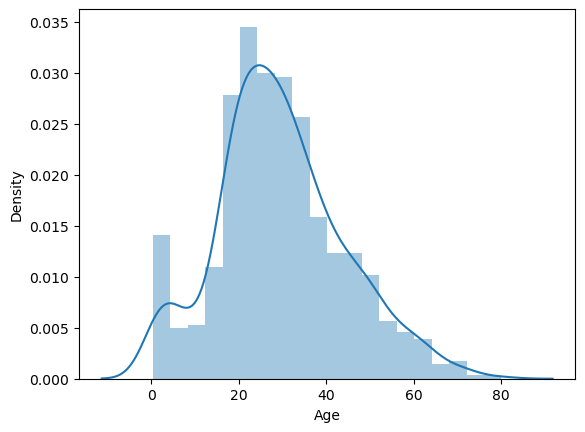

In [29]:
#Distribution of the age of the passengers
sns.distplot(df['Age'].dropna())

In [31]:
# Age follows a normal distribution

/tmp/ipykernel_21/2028019738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=df,palette='flare')


<Axes: xlabel='SibSp', ylabel='count'>

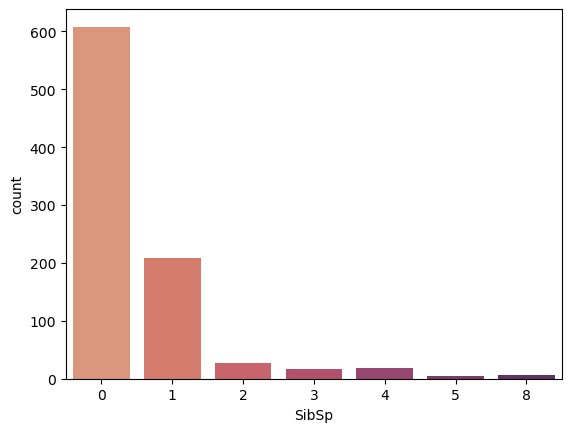

In [32]:
sns.countplot(x='SibSp',data=df,palette='flare')

In [34]:
# Obs : Maximum passengers did not hve siblings or spouse

<Axes: >

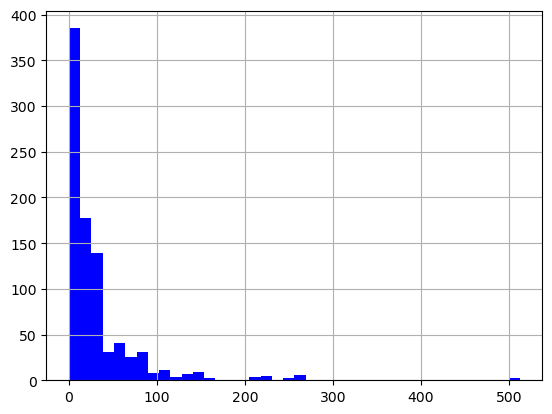

In [35]:
df['Fare'].hist(color='blue',bins=40)

#### Handling missing values

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

/tmp/ipykernel_21/134525434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

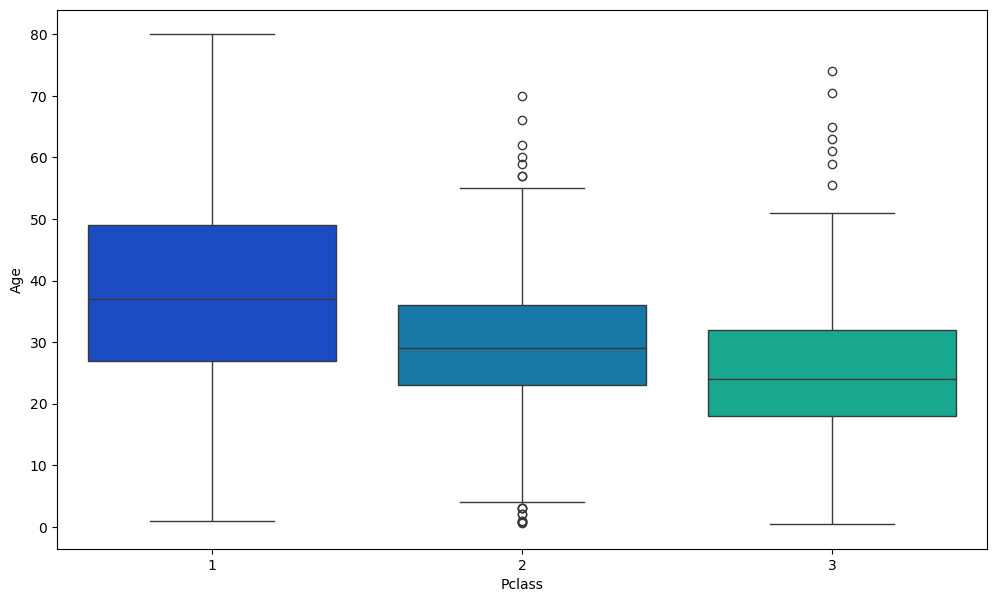

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [42]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_21/822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_21/822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [43]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Converting Categorical columns

In [48]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [50]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [51]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [53]:
df= pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


#### Now the data is clean and ready for model building

####  In this , we'll use Decision Tree to train our model

##### Train test split

In [55]:
## Separating dependent and independent variables
y=df.iloc[:,:1]
X=df.iloc[:,1:]


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [58]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=classifier.predict(X_test)

In [61]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1])

In [63]:
# Checking the performance
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       132
           1       0.72      0.70      0.71        91

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [66]:
print(confusion_matrix(y_test,y_pred))

[[107  25]
 [ 27  64]]


In [68]:
classifier.score(X_test,y_test)

0.7668161434977578

In [70]:
classifier.score(X_train,y_train)

0.9864864864864865